# Preprocessing and storing DF in pickle
Perhaps we might Dwh Pat Dn Date later on. 

In [175]:
import pandas as pd
import numpy as np
from pathlib import Path
import os 
from datetime import timedelta
pd.set_option('display.max_columns', None)
%matplotlib inline

data_path = str(Path(os.getcwd())) + "/data/"

def write_to_pickle(dataframe, name):
    dataframe.to_pickle(data_path + name + ".pickle")
def read_from_pickle(name): 
    return pd.read_pickle(data_path + name + ".pickle")

In [3]:
cd Dropbox/Healthcare work Patric

/Users/aa/Dropbox/Healthcare work Patric


In [4]:
bio = pd.read_excel('20170713_Marc Gliomes_Bio.xlsx', index_col = None)
clin = pd.read_excel('20170713_Marc Gliomes_Clin.xlsx', index_col = None)

In [5]:
b = bio.loc[bio['Pat Nip']==4406078178,'Dwh Prv Date Chir']
c = clin.loc[clin['Pat Nip']==4406078178,'Clin Chir Date']

#c.iloc[:len(c)]=1
#clin.loc[clin['Pat Nip']==4406078178,'Clin Chir Date'] = c
#clin.loc[clin['Pat Nip']==4406078178,'Clin Chir Date'] 
#print(clin.loc[clin['Pat Nip']==4406078178,'Clin Chir Date'].iloc[i])
#clin.loc[clin['Pat Nip']==4406078178,'Clin Chir Date']    
#bio['Dwh Prv Date Chir'] = bio['Dwh Prv Date Chir'].apply(lambda x: x.to_pydatetime())
#bio.loc[2,'Dwh Prv Date Chir'].to_pydatetime()-timedelta(days=1)
#clin['Clin Chir Date'] = clin['Clin Chir Date'].apply(lambda x: x.to_pydatetime() + timedelta(days=1))
#bio['Dwh Prv Date Chir'] = bio['Dwh Prv Date Chir'].apply(lambda x: x.to_pydatetime())

Fix the surgery and clinical date so that they match

In [6]:
# Make the two surgery dates match 
# You are taking copies of the dataframe with loc and iloc, so you need to pay attention when you do assignment
# Can definitely remove one or both 'for' loops
for val in np.unique(clin['Pat Nip']): 
    bio_data = bio.loc[bio['Pat Nip']==val,'Dwh Prv Date Chir']
    clin_data = clin.loc[clin['Pat Nip']==val,'Clin Chir Date']
    lc = len(clin_data)
    lb = len(bio_data)
    if lc <=lb:
        for i in range(0,lc):
            clin_data.iloc[i] = bio_data.iloc[i]        
    else: 
        for i in range(0,lb):
            clin_data.iloc[i] = bio_data.iloc[i]
    clin.loc[clin['Pat Nip']==val,'Clin Chir Date'] = clin_data        

In [7]:
df = pd.merge(bio, clin, left_on = ['Pat Nip','Dwh Prv Date Chir'], right_on = ['Pat Nip','Clin Chir Date'],how='outer')
df.columns

Index(['Dwh Prv Nip', 'Dwh Pat Consentement', 'Pat Nip', 'Pat Sexe_x',
       'Pat Date Naissance_x', 'Dwh Pat Dn Date_x', 'Dwh Pat Date Deces_x',
       'Dwh Prv Date Chir', 'Dwh Prv Diag Histologie', 'Grade', 'Dwh Gen Idh1',
       'Dwh Gen Idh2', 'Dwh Gen Htert C228T', 'Dwh Gen Htert C250T',
       'Dwh Gen P53', 'Dwh Gen Mgmt', 'Dwh Gen Egfr', 'Dwh Gen Mdm2',
       'Dwh Gen Cdk4', 'Dwh Gen P16', 'Dwh Ihc Atrx', 'Dwh Chr Ch1P',
       'Dwh Chr Ch19Q', 'Dwh Chr Ch10P', 'Dwh Chr Ch10Q', 'Dwh Chr Ch9P',
       'Dwh Chr Ch9Q', 'Dwh Pat Tumeur Siege', 'Dwh Pat Tumeur Position',
       'Pat Sexe_y', 'Pat Date Naissance_y', 'Dwh Pat Dn Date_y',
       'Dwh Pat Date Deces_y', 'Clin Diag Histologie', 'Grade histo',
       'Clin Chir Date', 'Clin Evolution', 'Clin Type Chirurgie',
       'Clin Rx Date', 'Dwh Chm Date Debut'],
      dtype='object')

Before merging sexes, birthdays and deaths

In [8]:
# Can check before merging the whole thing as well. 
#bio['Pat Sexe'].isnull().value_counts()
print(df['Pat Sexe_x'].isnull().value_counts())
print(df['Pat Date Naissance_x'].isnull().value_counts())
print(df['Dwh Pat Date Deces_x'].isnull().value_counts())

False    7456
True      369
Name: Pat Sexe_x, dtype: int64
False    7725
True      100
Name: Pat Date Naissance_x, dtype: int64
True     4921
False    2904
Name: Dwh Pat Date Deces_x, dtype: int64


# Copy all _y columns into _x: sex, birthday and death, clinical histology, grade histology

In [9]:
for val in np.unique(df['Pat Nip']): 
    x_data = df.loc[df['Pat Nip']==val,'Pat Sexe_x']
    y_data = df.loc[df['Pat Nip']==val,'Pat Sexe_y']
    lc = len(x_data)
    for i in range(0,lc):
        check = x_data.iloc[i]
        if pd.isnull(check):
             x_data.iloc[i] = y_data.iloc[i]        
    df.loc[df['Pat Nip']==val,'Pat Sexe_x'] = x_data

for val in np.unique(df['Pat Nip']): 
    x_data = df.loc[df['Pat Nip']==val,'Pat Date Naissance_x']
    y_data = df.loc[df['Pat Nip']==val,'Pat Date Naissance_y']
    lc = len(x_data)
    for i in range(0,lc):
        check = x_data.iloc[i]
        if pd.isnull(check):
             x_data.iloc[i] = y_data.iloc[i]        
    df.loc[df['Pat Nip']==val,'Pat Date Naissance_x'] = x_data    

for val in np.unique(df['Pat Nip']): 
    x_data = df.loc[df['Pat Nip']==val,'Dwh Pat Date Deces_x']
    y_data = df.loc[df['Pat Nip']==val,'Dwh Pat Date Deces_y']
    lc = len(x_data)
    for i in range(0,lc):
        check = x_data.iloc[i]
        if pd.isnull(check):
             x_data.iloc[i] = y_data.iloc[i]        
    df.loc[df['Pat Nip']==val,'Dwh Pat Date Deces_x'] = x_data   
    
for val in np.unique(df['Pat Nip']): 
    x_data = df.loc[df['Pat Nip']==val,'Dwh Prv Diag Histologie']
    y_data = df.loc[df['Pat Nip']==val,'Clin Diag Histologie']
    lc = len(x_data)
    for i in range(0,lc):
        check = x_data.iloc[i]
        if pd.isnull(check):
             x_data.iloc[i] = y_data.iloc[i]        
    df.loc[df['Pat Nip']==val,'Dwh Prv Diag Histologie'] = x_data   

for val in np.unique(df['Pat Nip']): 
    x_data = df.loc[df['Pat Nip']==val,'Grade']
    y_data = df.loc[df['Pat Nip']==val,'Grade histo']
    lc = len(x_data)
    for i in range(0,lc):
        check = x_data.iloc[i]
        if pd.isnull(check):
             x_data.iloc[i] = y_data.iloc[i]        
    df.loc[df['Pat Nip']==val,'Grade'] = x_data   

for val in np.unique(df['Pat Nip']): 
    x_data = df.loc[df['Pat Nip']==val,'Dwh Pat Dn Date_x']
    y_data = df.loc[df['Pat Nip']==val,'Dwh Pat Dn Date_y']
    lc = len(x_data)
    for i in range(0,lc):
        check = x_data.iloc[i]
        if pd.isnull(check):
             x_data.iloc[i] = y_data.iloc[i]        
    df.loc[df['Pat Nip']==val,'Dwh Pat Dn Date_x'] = x_data   


In [10]:
# A small improvement
print(df['Pat Sexe_x'].isnull().value_counts())
print(df['Pat Date Naissance_x'].isnull().value_counts())
print(df['Dwh Pat Date Deces_x'].isnull().value_counts())
print(df['Dwh Prv Diag Histologie'].isnull().value_counts())
# Testing for empty values with an example to make sure merge is correct 
#clin.loc[clin['Pat Nip']==1111112776, 'Pat Sexe'].values
#clin['Pat Sexe'].value_counts()
#clin.loc[clin['Pat Sexe'].isnull()==True,'Pat Nip']

False    7493
True      332
Name: Pat Sexe_x, dtype: int64
False    7762
True       63
Name: Pat Date Naissance_x, dtype: int64
True     4908
False    2917
Name: Dwh Pat Date Deces_x, dtype: int64
False    7825
Name: Dwh Prv Diag Histologie, dtype: int64


In [11]:
df.rename(columns = {'Pat Nip':'ID','Pat Sexe_x':'Sex','Dwh Pat Dn Date_x':'Diagnostic_date','Pat Date Naissance_x':'DoB','Dwh Pat Date Deces_x':'Death_date',
                      'Dwh Prv Date Chir':'Surgery_date', 'Dwh Prv Diag Histologie':'Tumor_type','Grade':'Tumor_grade',
                      'Dwh Gen Idh1':'Gene_Idh1', 'Dwh Gen Idh2':'Gene_Idh2','Dwh Gen Htert C228T':'Gene_Htert_C228T', 
                      'Dwh Gen Htert C250T':'Gene_Htert_C250T', "Dwh Gen P53":'Gene_P53', 'Dwh Gen Mgmt':'Gene_Mgmt', 
                      'Dwh Gen Egfr':'Gene_Egfr', 'Dwh Gen Mdm2':'Gene_Mdm2','Dwh Gen Cdk4':'Gene_Cdk4',
                      'Dwh Gen P16':'Gene_P16', 'Dwh Ihc Atrx':'Gene_Ihc_Atrx', 'Dwh Chr Ch1P':'Gene_Ch1P',
                      'Dwh Chr Ch19Q':'Gene_Ch19Q', 'Dwh Chr Ch10P':'Gene_Ch10P', 'Dwh Chr Ch10Q':'Gene_Ch10Q', 'Dwh Chr Ch9P':'Gene_Ch9P',
                      'Dwh Chr Ch9Q':'Gene_Ch9Q', 'Dwh Pat Tumeur Siege':'Tumor_Location', 'Dwh Pat Tumeur Position':'Tumor_Position',
                      'Clin Evolution':'Clinical_evolution', 'Clin Type Chirurgie':'Surgery_type',
                      'Clin Rx Date':'Rx_date', 'Dwh Chm Date Debut':'Chemo_start_date'}, inplace = True)
df.drop(['Dwh Pat Dn Date_y','Pat Sexe_y','Dwh Pat Date Deces_y','Pat Date Naissance_y'], axis=1,inplace=True)
df.drop('Dwh Pat Consentement', axis=1, inplace=True)
df.drop('Dwh Prv Nip', axis=1, inplace=True)
df.drop(['Clin Diag Histologie', 'Grade histo','Clin Chir Date',],axis=1,inplace=True)

# Diagnostic very sparse, 2000 entries out of 7000
#interesting to analyze surgery date, all other things being equal. or any other proxy of impact of surgeon?
#what is the right measure of survival? date of diagnosis? date of surgery? none marks the actual 'beginning'. survival
#post diagnosis after controlling for tumor stage?

In [12]:
df.rename(columns = {'Sex':'Gender'},inplace = True) # forgot about this one
#write_to_pickle(df,'post_merge_data')
df.head(2)
#df = read_from_pickle('post_merge_data')

,ID,Gender,DoB,Diagnostic_date,Death_date,Surgery_date,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Rx_date,Chemo_start_date
0,4,M,1940-05-22,NaN,2001-02-22,2000-05-30,glioblastome IV,4.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autre,G,P1,exérèse,2000-07-07,NaT
1,5,M,1947-10-15,NaN,1999-12-15,1999-05-29,glioblastome IV,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sus-T hémisp,G,TT ini,biopsie,1999-07-12,1999-06-29


In [13]:
df.columns

Index(['ID', 'Gender', 'DoB', 'Diagnostic_date', 'Death_date', 'Surgery_date',
       'Tumor_type', 'Tumor_grade', 'Gene_Idh1', 'Gene_Idh2',
       'Gene_Htert_C228T', 'Gene_Htert_C250T', 'Gene_P53', 'Gene_Mgmt',
       'Gene_Egfr', 'Gene_Mdm2', 'Gene_Cdk4', 'Gene_P16', 'Gene_Ihc_Atrx',
       'Gene_Ch1P', 'Gene_Ch19Q', 'Gene_Ch10P', 'Gene_Ch10Q', 'Gene_Ch9P',
       'Gene_Ch9Q', 'Tumor_Location', 'Tumor_Position', 'Clinical_evolution',
       'Surgery_type', 'Rx_date', 'Chemo_start_date'],
      dtype='object')

In [14]:
len(df.columns)
#df[df.ID ==4406078178]
df.Gene_Idh2.value_counts()

NORMAL    3941
NC        3031
ALTERE     106
Name: Gene_Idh2, dtype: int64

In [15]:
df.Death_date.isnull().value_counts()

True     4908
False    2917
Name: Death_date, dtype: int64

# End of merging. Next we deal with nan/empty values

In [16]:
#Multiple entries for the same person, can we treat them independently?
#df.loc[df.ID==4204007149]

In [17]:
df.Gene_Idh1.isnull().value_counts()

False    7327
True      498
Name: Gene_Idh1, dtype: int64

In [18]:
df.Gene_Idh2.isnull().value_counts()

False    7078
True      747
Name: Gene_Idh2, dtype: int64

In [19]:
#we make a copy of the dataframe and retain only the observations for which EITHER of IDH1 or IDH2 is not null.
#if both are null, we delete the observation
df_clean = df.copy(deep=True)
len(df_clean.columns)
df_clean = df_clean.loc[(df_clean['Gene_Idh2'].notnull()) | (df_clean['Gene_Idh1'].notnull())]

In [20]:
df_final = df_clean

In [21]:
df_final.Gene_Ch9P.value_counts()

NON PERTE    2420
PARTIEL       817
PERDU         756
GAIN           97
Name: Gene_Ch9P, dtype: int64

In [22]:
for col in df_clean.columns:
     print('{0}\n  {1}\n'.format(col,df_clean[col].isnull().value_counts()))

ID
  False    7397
Name: ID, dtype: int64

Gender
  False    7084
True      313
Name: Gender, dtype: int64

DoB
  False    7344
True       53
Name: DoB, dtype: int64

Diagnostic_date
  True     5345
False    2052
Name: Diagnostic_date, dtype: int64

Death_date
  True     4587
False    2810
Name: Death_date, dtype: int64

Surgery_date
  False    7033
True      364
Name: Surgery_date, dtype: int64

Tumor_type
  False    7397
Name: Tumor_type, dtype: int64

Tumor_grade
  False    7397
Name: Tumor_grade, dtype: int64

Gene_Idh1
  False    7327
True       70
Name: Gene_Idh1, dtype: int64

Gene_Idh2
  False    7078
True      319
Name: Gene_Idh2, dtype: int64

Gene_Htert_C228T
  False    4331
True     3066
Name: Gene_Htert_C228T, dtype: int64

Gene_Htert_C250T
  False    4328
True     3069
Name: Gene_Htert_C250T, dtype: int64

Gene_P53
  False    6447
True      950
Name: Gene_P53, dtype: int64

Gene_Mgmt
  True     6117
False    1280
Name: Gene_Mgmt, dtype: int64

Gene_Egfr
  False    4388
Tr

In [23]:
#let's drop the diagnostic date
df_clean.drop('Diagnostic_date', axis = 1, inplace=True)

In [24]:
#create a new variable, age at surgery
df_clean['Age_surgery'] = df_clean['Surgery_date'] - df_clean['DoB']

In [25]:
#let's convert the age at surgery from days to years
df_clean['Age_surgery'] = df_clean['Age_surgery'] / np.timedelta64(1, 'Y')

In [26]:
df_clean['Age_surgery'] = df_clean['Age_surgery'].round()

In [27]:
df_clean['life_expectancy'] = df_clean['Death_date'] - df_clean['Surgery_date']
df_clean['life_expectancy'] = df_clean['life_expectancy'] / np.timedelta64(1, 'D')

In [28]:
df_clean

,ID,Gender,DoB,Death_date,Surgery_date,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Rx_date,Chemo_start_date,Age_surgery,life_expectancy
0,4,M,1940-05-22,2001-02-22,2000-05-30,glioblastome IV,4.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autre,G,P1,exérèse,2000-07-07,NaT,60.0,268.0
2,10,M,1949-11-05,1992-05-15,1992-04-15,gliome mixte ana III,3.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992-05-01,1992-05-01,42.0,30.0
3,11,M,1958-07-29,1991-11-15,1986-03-17,astrocytome bas grade II,2.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non précisé,non précisé,TT ini,exérèse,1986-04-01,NaT,28.0,2069.0
4,11,M,1958-07-29,1991-11-15,1991-08-14,glioblastome IV,4.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PARTIEL,PERDU,NaN,non précisé,non précisé,P1,exérèse,NaT,NaT,33.0,93.0
5,12,F,1930-12-07,1991-03-13,1990-02-13,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,NaN,sus-T hémisp,G,TT ini,aucune,1990-03-14,NaT,59.0,393.0
7,13,M,1928-11-17,1990-12-20,1989-11-17,glioblastome IV,4.0,NORMAL,NaN,NORMAL,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NaN,NaN,sus-T hémisp,D,TT ini,partielle,1989-12-18,NaT,61.0,398.0
8,14,F,1934-07-17,1993-03-30,1992-01-22,glioblastome avec oligo. IV,4.0,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,NaN,AMPLIFIE,NORMAL,NORMAL,NORMAL,NaN,GAIN,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,D,TT ini,exérèse,NaT,NaT,58.0,433.0
9,15,M,1936-03-22,1992-03-14,1991-10-23,glioblastome IV,4.0,NORMAL,NORMAL,ALTERE,NORMAL,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,NaN,PARTIEL,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,exérèse,1991-11-19,NaT,56.0,143.0
10,16,M,1922-04-18,1991-12-22,1990-11-09,glioblastome IV,4.0,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,NaN,PERDU,NON PERTE,NaN,non précisé,G,TT ini,exérèse,1990-12-01,NaT,69.0,408.0
11,17,M,1924-04-12,1990-04-04,1990-03-28,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,non précisé,non précisé,TT ini,exérèse,NaT,NaT,66.0,7.0


In [29]:
#let's make a copy of the clean dataset before proceeding
df_clean_test = df_clean.copy()

In [30]:
#let's visualize where we are in the processing
df_clean_test.head(5)

,ID,Gender,DoB,Death_date,Surgery_date,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Rx_date,Chemo_start_date,Age_surgery,life_expectancy
0,4,M,1940-05-22,2001-02-22,2000-05-30,glioblastome IV,4.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autre,G,P1,exérèse,2000-07-07,NaT,60.0,268.0
2,10,M,1949-11-05,1992-05-15,1992-04-15,gliome mixte ana III,3.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992-05-01,1992-05-01,42.0,30.0
3,11,M,1958-07-29,1991-11-15,1986-03-17,astrocytome bas grade II,2.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non précisé,non précisé,TT ini,exérèse,1986-04-01,NaT,28.0,2069.0
4,11,M,1958-07-29,1991-11-15,1991-08-14,glioblastome IV,4.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PARTIEL,PERDU,NaN,non précisé,non précisé,P1,exérèse,NaT,NaT,33.0,93.0
5,12,F,1930-12-07,1991-03-13,1990-02-13,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,NaN,sus-T hémisp,G,TT ini,aucune,1990-03-14,NaT,59.0,393.0


In [31]:
#checking possible values of IDH
df_clean_test['Gene_Idh1'].value_counts()

NORMAL    2630
ALTERE    2434
NC        2263
Name: Gene_Idh1, dtype: int64

In [32]:
#checking possible values of TERT
df_clean_test['Gene_Htert_C228T'].value_counts()

NORMAL    2064
ALTERE    1646
NC         621
Name: Gene_Htert_C228T, dtype: int64

In [33]:
#implementing clinical interaction variable between IDH and TERT
df_clean_test.loc[((df_clean_test['Gene_Idh1'] == 'ALTERE') | (df_clean_test['Gene_Idh2'] == 'ALTERE')) & ((df_clean_test['Gene_Htert_C228T'] == "ALTERE") | (df_clean_test['Gene_Htert_C250T'] == "ALTERE")), "IDH_TERT"] = 1; df_clean_test
df_clean_test.loc[((df_clean_test['Gene_Idh1'] == 'ALTERE') | (df_clean_test['Gene_Idh2'] == 'ALTERE')) & ((df_clean_test['Gene_Htert_C228T'] == "NORMAL") | (df_clean_test['Gene_Htert_C250T'] == "NORMAL")), "IDH_TERT"] = 2; df_clean_test
df_clean_test.loc[((df_clean_test['Gene_Idh1'] == 'NORMAL') | (df_clean_test['Gene_Idh2'] == 'NORMAL')) & ((df_clean_test['Gene_Htert_C228T'] == "NORMAL") | (df_clean_test['Gene_Htert_C250T'] == "NORMAL")), "IDH_TERT"] = 3; df_clean_test
df_clean_test.loc[((df_clean_test['Gene_Idh1'] == 'NORMAL') | (df_clean_test['Gene_Idh2'] == 'NORMAL')) & ((df_clean_test['Gene_Htert_C228T'] == "ALTERE") | (df_clean_test['Gene_Htert_C250T'] == "ALTERE")), "IDH_TERT"] = 4; df_clean_test

,ID,Gender,DoB,Death_date,Surgery_date,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Rx_date,Chemo_start_date,Age_surgery,life_expectancy,IDH_TERT
0,4,M,1940-05-22,2001-02-22,2000-05-30,glioblastome IV,4.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autre,G,P1,exérèse,2000-07-07,NaT,60.0,268.0,NaN
2,10,M,1949-11-05,1992-05-15,1992-04-15,gliome mixte ana III,3.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992-05-01,1992-05-01,42.0,30.0,3.0
3,11,M,1958-07-29,1991-11-15,1986-03-17,astrocytome bas grade II,2.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non précisé,non précisé,TT ini,exérèse,1986-04-01,NaT,28.0,2069.0,NaN
4,11,M,1958-07-29,1991-11-15,1991-08-14,glioblastome IV,4.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PARTIEL,PERDU,NaN,non précisé,non précisé,P1,exérèse,NaT,NaT,33.0,93.0,3.0
5,12,F,1930-12-07,1991-03-13,1990-02-13,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,NaN,sus-T hémisp,G,TT ini,aucune,1990-03-14,NaT,59.0,393.0,4.0
7,13,M,1928-11-17,1990-12-20,1989-11-17,glioblastome IV,4.0,NORMAL,NaN,NORMAL,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NaN,NaN,sus-T hémisp,D,TT ini,partielle,1989-12-18,NaT,61.0,398.0,3.0
8,14,F,1934-07-17,1993-03-30,1992-01-22,glioblastome avec oligo. IV,4.0,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,NaN,AMPLIFIE,NORMAL,NORMAL,NORMAL,NaN,GAIN,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,D,TT ini,exérèse,NaT,NaT,58.0,433.0,4.0
9,15,M,1936-03-22,1992-03-14,1991-10-23,glioblastome IV,4.0,NORMAL,NORMAL,ALTERE,NORMAL,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,NaN,PARTIEL,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,exérèse,1991-11-19,NaT,56.0,143.0,4.0
10,16,M,1922-04-18,1991-12-22,1990-11-09,glioblastome IV,4.0,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,NaN,PERDU,NON PERTE,NaN,non précisé,G,TT ini,exérèse,1990-12-01,NaT,69.0,408.0,3.0
11,17,M,1924-04-12,1990-04-04,1990-03-28,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,non précisé,non précisé,TT ini,exérèse,NaT,NaT,66.0,7.0,4.0


In [34]:
#let's check for patients having several records.
#discussion is to keep only the first record.
df_clean_test['ID'].duplicated().value_counts()

False    6376
True     1021
Name: ID, dtype: int64

In [35]:
#before removing duplicates, let's sort dataset observations (rows) by both ID
#and surgery date, to make sure we keep only the earliest surgery date record.
df_clean_test.sort(['ID', 'Surgery_date'])

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,ID,Gender,DoB,Death_date,Surgery_date,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Rx_date,Chemo_start_date,Age_surgery,life_expectancy,IDH_TERT
0,4,M,1940-05-22,2001-02-22,2000-05-30,glioblastome IV,4.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autre,G,P1,exérèse,2000-07-07,NaT,60.0,268.0,NaN
2,10,M,1949-11-05,1992-05-15,1992-04-15,gliome mixte ana III,3.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992-05-01,1992-05-01,42.0,30.0,3.0
3,11,M,1958-07-29,1991-11-15,1986-03-17,astrocytome bas grade II,2.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non précisé,non précisé,TT ini,exérèse,1986-04-01,NaT,28.0,2069.0,NaN
4,11,M,1958-07-29,1991-11-15,1991-08-14,glioblastome IV,4.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PARTIEL,PERDU,NaN,non précisé,non précisé,P1,exérèse,NaT,NaT,33.0,93.0,3.0
5,12,F,1930-12-07,1991-03-13,1990-02-13,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,NaN,sus-T hémisp,G,TT ini,aucune,1990-03-14,NaT,59.0,393.0,4.0
7,13,M,1928-11-17,1990-12-20,1989-11-17,glioblastome IV,4.0,NORMAL,NaN,NORMAL,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NaN,NaN,sus-T hémisp,D,TT ini,partielle,1989-12-18,NaT,61.0,398.0,3.0
8,14,F,1934-07-17,1993-03-30,1992-01-22,glioblastome avec oligo. IV,4.0,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,NaN,AMPLIFIE,NORMAL,NORMAL,NORMAL,NaN,GAIN,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,D,TT ini,exérèse,NaT,NaT,58.0,433.0,4.0
9,15,M,1936-03-22,1992-03-14,1991-10-23,glioblastome IV,4.0,NORMAL,NORMAL,ALTERE,NORMAL,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,NaN,PARTIEL,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,exérèse,1991-11-19,NaT,56.0,143.0,4.0
10,16,M,1922-04-18,1991-12-22,1990-11-09,glioblastome IV,4.0,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,NaN,PERDU,NON PERTE,NaN,non précisé,G,TT ini,exérèse,1990-12-01,NaT,69.0,408.0,3.0
11,17,M,1924-04-12,1990-04-04,1990-03-28,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,non précisé,non précisé,TT ini,exérèse,NaT,NaT,66.0,7.0,4.0


In [85]:
#we create a new column indicating if the row is a duplicate or not "Yes/False"
df_clean_test['multiple_surgeries'] = df_clean_test.duplicated(['ID'])

In [86]:
#we check sum of True = duplicates
df_clean_test['multiple_surgeries'].sum()

1021

In [87]:
len(df_clean_test)

7397

In [88]:
#we reduce the dataframe to the observations that don't have several records
df_final = df_clean_test.loc[df_clean_test['multiple_surgeries'] == False]

In [89]:
len(df_final)

6376

In [90]:
df_final

,ID,Gender,DoB,Death_date,Surgery_date,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Rx_date,Chemo_start_date,Age_surgery,life_expectancy,IDH_TERT,multiple_surgeries
0,4,M,1940-05-22,2001-02-22,2000-05-30,glioblastome IV,4.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autre,G,P1,exérèse,2000-07-07,NaT,60.0,268.0,NaN,False
2,10,M,1949-11-05,1992-05-15,1992-04-15,gliome mixte ana III,3.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992-05-01,1992-05-01,42.0,30.0,3.0,False
3,11,M,1958-07-29,1991-11-15,1986-03-17,astrocytome bas grade II,2.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non précisé,non précisé,TT ini,exérèse,1986-04-01,NaT,28.0,2069.0,NaN,False
5,12,F,1930-12-07,1991-03-13,1990-02-13,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,NaN,sus-T hémisp,G,TT ini,aucune,1990-03-14,NaT,59.0,393.0,4.0,False
7,13,M,1928-11-17,1990-12-20,1989-11-17,glioblastome IV,4.0,NORMAL,NaN,NORMAL,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NaN,NaN,sus-T hémisp,D,TT ini,partielle,1989-12-18,NaT,61.0,398.0,3.0,False
8,14,F,1934-07-17,1993-03-30,1992-01-22,glioblastome avec oligo. IV,4.0,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,NaN,AMPLIFIE,NORMAL,NORMAL,NORMAL,NaN,GAIN,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,D,TT ini,exérèse,NaT,NaT,58.0,433.0,4.0,False
9,15,M,1936-03-22,1992-03-14,1991-10-23,glioblastome IV,4.0,NORMAL,NORMAL,ALTERE,NORMAL,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,NaN,PARTIEL,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,exérèse,1991-11-19,NaT,56.0,143.0,4.0,False
10,16,M,1922-04-18,1991-12-22,1990-11-09,glioblastome IV,4.0,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,NaN,PERDU,NON PERTE,NaN,non précisé,G,TT ini,exérèse,1990-12-01,NaT,69.0,408.0,3.0,False
11,17,M,1924-04-12,1990-04-04,1990-03-28,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,non précisé,non précisé,TT ini,exérèse,NaT,NaT,66.0,7.0,4.0,False
12,18,F,1931-06-05,1992-12-18,1992-02-06,astrocytome anaplasique III,3.0,NORMAL,NORMAL,ALTERE,NORMAL,NORMAL,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NaN,NON PERTE,NON PERTE,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992-03-01,NaT,61.0,316.0,4.0,False


In [91]:
#convert radiotherapy date to datetime object in order to keep only year
df_final['Rx_date'] = pd.to_datetime(df_final['Rx_date'], errors = 'coerce')

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [92]:
df_final['Rx_date'] = df_final['Rx_date'].dt.year

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [93]:
#convert chemotherapy date to datetime object in order to keep only year
df_final['Chemo_start_date'] = pd.to_datetime(df_final['Chemo_start_date'], errors = 'coerce')
df_final['Chemo_start_date'] = df_final['Chemo_start_date'].dt.year

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [94]:
#import KPS dataset to merge it
kps = pd.read_excel('KPS.xlsx')

In [95]:
kps.head(5)

,NIP,ID_EC,CHIR_DATE,IK_CLINIQUE,CHIR_IK_PRE,RX_IK_PRE
0,29,TTini,17/11/1988,NaN,NaN,NaN
1,30,TTini,25/09/1990,NaN,100.0,100.0
2,31,TTini,04/05/1992,NaN,NaN,NaN
3,32,TTini,05/11/1993,NaN,NaN,NaN
4,33,TTini,01/05/1973,NaN,NaN,NaN


In [96]:
#sort by ID and surgery date, as above
kps_sorted = kps.sort(['NIP', 'CHIR_DATE'])

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [97]:
kps_sorted['duplicated'] = kps_sorted.duplicated('NIP')

In [98]:
kps_sorted.head(5)

,NIP,ID_EC,CHIR_DATE,IK_CLINIQUE,CHIR_IK_PRE,RX_IK_PRE,duplicated
48,1,TTini,31/12/1998,NaN,NaN,NaN,False
49,2,TTini,31/12/1997,NaN,NaN,NaN,False
6803,2,P1,NaN,50.0,NaN,NaN,True
10965,2,P2,NaN,50.0,NaN,NaN,True
50,3,TTini,09/02/2000,NaN,NaN,40.0,False


In [99]:
kps_sorted_final = kps_sorted[kps_sorted['duplicated'] == False]

In [100]:
kps_sorted_final.head(5)

,NIP,ID_EC,CHIR_DATE,IK_CLINIQUE,CHIR_IK_PRE,RX_IK_PRE,duplicated
48,1,TTini,31/12/1998,NaN,NaN,NaN,False
49,2,TTini,31/12/1997,NaN,NaN,NaN,False
50,3,TTini,09/02/2000,NaN,NaN,40.0,False
51,4,TTini,22/09/1999,NaN,NaN,NaN,False
52,5,TTini,29/05/1999,NaN,70.0,60.0,False


In [101]:
kps_sorted_final['IK_CLINIQUE'].value_counts()

90.0     269
80.0     268
70.0     161
60.0     108
100.0     89
50.0      45
40.0      27
20.0       8
30.0       7
0.0        4
95.0       2
75.0       2
65.0       1
10.0       1
Name: IK_CLINIQUE, dtype: int64

In [102]:
kps_sorted_final['ID_EC'].value_counts()

TTini    6159
P1        421
P2        125
P3         50
P4         14
P5          2
P6          1
Name: ID_EC, dtype: int64

In [103]:
#keep only columns that are of interest or needed for the merge
kps_sorted_final = kps[['NIP', 'ID_EC', 'IK_CLINIQUE', 'CHIR_DATE', 'CHIR_IK_PRE', 'RX_IK_PRE']]

In [104]:
df_final['Surgery_date'].dtype

dtype('<M8[ns]')

In [105]:
#convert the two columns that are dates and will be used in the merge as
#datetime elements so that merge reads a same date in the two datasets correctly
df_final['Surgery_date'] = pd.to_datetime(df_final['Surgery_date'], errors = 'coerce')
kps_sorted_final['CHIR_DATE'] = pd.to_datetime(kps_sorted_final['CHIR_DATE'], errors = 'coerce')

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [106]:
#merge KPS into df_final (left merge) by both ID and surgery date
df_final_kps = pd.merge(df_final, kps_sorted_final, how = 'left', left_on = ['ID', 'Surgery_date'], right_on = ['NIP', 'CHIR_DATE'])

In [107]:
len(df_final)

6376

In [108]:
len(df_final_kps)

6383

In [109]:
#why is len of merged dataset 7 records longer than original left dataset i.e. df_final?

In [110]:
#let's code Rx date into either 1 if date is present, or leave it as missing otherwise
df_final_kps['RX'] = np.where(df_final_kps['Rx_date'].notnull(), 1, np.NaN)

In [111]:
df_final_kps['CHEM'] = np.where(df_final_kps['Chemo_start_date'].notnull(), 1, np.NaN)

In [112]:
#drop NIP as it's duplicate of ID after the merge
#drop multiple surgeries as it was only needed to remove duplicates
#drop CHIR Date as it comes from KPS dataset after merge and is duplicate of Surgery_date
#drop Rx_date and Chemo_start_date
#Final dataset before imputation
#df_final_kps.drop('NIP', axis = 1, inplace=True)
#df_final_kps.drop('multiple_surgeries', axis = 1, inplace=True)
#df_final_kps.drop('CHIR_DATE', axis = 1, inplace=True)
#df_final_kps.drop('Chemo_start_date', axis = 1, inplace=True)
#df_final_kps.drop('Rx_date', axis = 1, inplace=True)
df_final_kps

,ID,Gender,DoB,Death_date,Surgery_date,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Rx_date,Chemo_start_date,Age_surgery,life_expectancy,IDH_TERT,multiple_surgeries,NIP,ID_EC,IK_CLINIQUE,CHIR_DATE,CHIR_IK_PRE,RX_IK_PRE,RX,CHEM
0,4,M,1940-05-22,2001-02-22,2000-05-30,glioblastome IV,4.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autre,G,P1,exérèse,2000.0,NaN,60.0,268.0,NaN,False,4.000000e+00,P1,NaN,2000-05-30,NaN,80.0,1.0,NaN
1,10,M,1949-11-05,1992-05-15,1992-04-15,gliome mixte ana III,3.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992.0,1992.0,42.0,30.0,3.0,False,1.000000e+01,TTini,NaN,1992-04-15,NaN,NaN,1.0,1.0
2,11,M,1958-07-29,1991-11-15,1986-03-17,astrocytome bas grade II,2.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non précisé,non précisé,TT ini,exérèse,1986.0,NaN,28.0,2069.0,NaN,False,1.100000e+01,TTini,NaN,1986-03-17,80.0,80.0,1.0,NaN
3,12,F,1930-12-07,1991-03-13,1990-02-13,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,NaN,sus-T hémisp,G,TT ini,aucune,1990.0,NaN,59.0,393.0,4.0,False,1.200000e+01,TTini,NaN,1990-02-13,NaN,70.0,1.0,NaN
4,13,M,1928-11-17,1990-12-20,1989-11-17,glioblastome IV,4.0,NORMAL,NaN,NORMAL,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NaN,NaN,sus-T hémisp,D,TT ini,partielle,1989.0,NaN,61.0,398.0,3.0,False,1.300000e+01,TTini,NaN,1989-11-17,60.0,NaN,1.0,NaN
5,14,F,1934-07-17,1993-03-30,1992-01-22,glioblastome avec oligo. IV,4.0,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,NaN,AMPLIFIE,NORMAL,NORMAL,NORMAL,NaN,GAIN,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,D,TT ini,exérèse,NaN,NaN,58.0,433.0,4.0,False,1.400000e+01,TTini,NaN,1992-01-22,70.0,NaN,NaN,NaN
6,15,M,1936-03-22,1992-03-14,1991-10-23,glioblastome IV,4.0,NORMAL,NORMAL,ALTERE,NORMAL,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,NaN,PARTIEL,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,exérèse,1991.0,NaN,56.0,143.0,4.0,False,1.500000e+01,TTini,NaN,1991-10-23,80.0,80.0,1.0,NaN
7,16,M,1922-04-18,1991-12-22,1990-11-09,glioblastome IV,4.0,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,NaN,PERDU,NON PERTE,NaN,non précisé,G,TT ini,exérèse,1990.0,NaN,69.0,408.0,3.0,False,NaN,NaN,NaN,NaT,NaN,NaN,1.0,NaN
8,17,M,1924-04-12,1990-04-04,1990-03-28,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,non précisé,non précisé,TT ini,exérèse,NaN,NaN,66.0,7.0,4.0,False,1.700000e+01,TTini,NaN,1990-03-28,NaN,NaN,NaN,NaN
9,18,F,1931-06-05,1992-12-18,1992-02-06,astrocytome anaplasique III,3.0,NORMAL,NORMAL,ALTERE,NORMAL,NORMAL,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NaN,NON PERTE,NON PERTE,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992.0,NaN,61.0,316.0,4.0,False,NaN,NaN,NaN,NaT,NaN,NaN,1.0,NaN


In [113]:
df_final_kps.columns

Index(['ID', 'Gender', 'DoB', 'Death_date', 'Surgery_date', 'Tumor_type',
       'Tumor_grade', 'Gene_Idh1', 'Gene_Idh2', 'Gene_Htert_C228T',
       'Gene_Htert_C250T', 'Gene_P53', 'Gene_Mgmt', 'Gene_Egfr', 'Gene_Mdm2',
       'Gene_Cdk4', 'Gene_P16', 'Gene_Ihc_Atrx', 'Gene_Ch1P', 'Gene_Ch19Q',
       'Gene_Ch10P', 'Gene_Ch10Q', 'Gene_Ch9P', 'Gene_Ch9Q', 'Tumor_Location',
       'Tumor_Position', 'Clinical_evolution', 'Surgery_type', 'Rx_date',
       'Chemo_start_date', 'Age_surgery', 'life_expectancy', 'IDH_TERT',
       'multiple_surgeries', 'NIP', 'ID_EC', 'IK_CLINIQUE', 'CHIR_DATE',
       'CHIR_IK_PRE', 'RX_IK_PRE', 'RX', 'CHEM'],
      dtype='object')

In [114]:
#reduce dataset to observations with a date of death
#df_final_kps = df_final_kps.dropna(subset = ['Death_date'])

In [115]:
#keep only observations for which either the death date is observed, or which had RX or CHEMO in 2017
df_final_kps = df_final_kps.loc[(df_final_kps['Death_date'].notnull())]

In [116]:
df_final_kps

,ID,Gender,DoB,Death_date,Surgery_date,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Rx_date,Chemo_start_date,Age_surgery,life_expectancy,IDH_TERT,multiple_surgeries,NIP,ID_EC,IK_CLINIQUE,CHIR_DATE,CHIR_IK_PRE,RX_IK_PRE,RX,CHEM
0,4,M,1940-05-22,2001-02-22,2000-05-30,glioblastome IV,4.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autre,G,P1,exérèse,2000.0,NaN,60.0,268.0,NaN,False,4.000000e+00,P1,NaN,2000-05-30,NaN,80.0,1.0,NaN
1,10,M,1949-11-05,1992-05-15,1992-04-15,gliome mixte ana III,3.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992.0,1992.0,42.0,30.0,3.0,False,1.000000e+01,TTini,NaN,1992-04-15,NaN,NaN,1.0,1.0
2,11,M,1958-07-29,1991-11-15,1986-03-17,astrocytome bas grade II,2.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non précisé,non précisé,TT ini,exérèse,1986.0,NaN,28.0,2069.0,NaN,False,1.100000e+01,TTini,NaN,1986-03-17,80.0,80.0,1.0,NaN
3,12,F,1930-12-07,1991-03-13,1990-02-13,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,NaN,sus-T hémisp,G,TT ini,aucune,1990.0,NaN,59.0,393.0,4.0,False,1.200000e+01,TTini,NaN,1990-02-13,NaN,70.0,1.0,NaN
4,13,M,1928-11-17,1990-12-20,1989-11-17,glioblastome IV,4.0,NORMAL,NaN,NORMAL,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NaN,NaN,sus-T hémisp,D,TT ini,partielle,1989.0,NaN,61.0,398.0,3.0,False,1.300000e+01,TTini,NaN,1989-11-17,60.0,NaN,1.0,NaN
5,14,F,1934-07-17,1993-03-30,1992-01-22,glioblastome avec oligo. IV,4.0,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,NaN,AMPLIFIE,NORMAL,NORMAL,NORMAL,NaN,GAIN,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,D,TT ini,exérèse,NaN,NaN,58.0,433.0,4.0,False,1.400000e+01,TTini,NaN,1992-01-22,70.0,NaN,NaN,NaN
6,15,M,1936-03-22,1992-03-14,1991-10-23,glioblastome IV,4.0,NORMAL,NORMAL,ALTERE,NORMAL,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,NaN,PARTIEL,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,exérèse,1991.0,NaN,56.0,143.0,4.0,False,1.500000e+01,TTini,NaN,1991-10-23,80.0,80.0,1.0,NaN
7,16,M,1922-04-18,1991-12-22,1990-11-09,glioblastome IV,4.0,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,NaN,PERDU,NON PERTE,NaN,non précisé,G,TT ini,exérèse,1990.0,NaN,69.0,408.0,3.0,False,NaN,NaN,NaN,NaT,NaN,NaN,1.0,NaN
8,17,M,1924-04-12,1990-04-04,1990-03-28,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,non précisé,non précisé,TT ini,exérèse,NaN,NaN,66.0,7.0,4.0,False,1.700000e+01,TTini,NaN,1990-03-28,NaN,NaN,NaN,NaN
9,18,F,1931-06-05,1992-12-18,1992-02-06,astrocytome anaplasique III,3.0,NORMAL,NORMAL,ALTERE,NORMAL,NORMAL,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NaN,NON PERTE,NON PERTE,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992.0,NaN,61.0,316.0,4.0,False,NaN,NaN,NaN,NaT,NaN,NaN,1.0,NaN


In [117]:
#df_final_kps['life_expectancy'] = pd.to_datetime(df_final_kps['life_expectancy'])
df_final_kps['life_expectancy'] = df_final_kps['life_expectancy'].round()

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [118]:
#create imputation dataset. Exclude date columns and irrelevant variables i.e. ID
#removed: ID, DoB, Death_date, Surgery_date, Chemo_start_date, Rx_date
imputation_set = df_final_kps[['Gender', 'Tumor_type', 'Tumor_grade', 'Gene_Idh1', 'Gene_Idh2', 'Gene_Htert_C228T',
       'Gene_Htert_C250T', 'Gene_P53', 'Gene_Mgmt', 'Gene_Egfr', 'Gene_Mdm2',
       'Gene_Cdk4', 'Gene_P16', 'Gene_Ihc_Atrx', 'Gene_Ch1P', 'Gene_Ch19Q',
       'Gene_Ch10P', 'Gene_Ch10Q', 'Gene_Ch9P', 'Gene_Ch9Q', 'Tumor_Location',
       'Tumor_Position', 'Clinical_evolution', 'Surgery_type','Age_surgery', 'life_expectancy',
        'IDH_TERT', 'ID_EC', 'IK_CLINIQUE', 'CHIR_IK_PRE', 'RX_IK_PRE']]

In [119]:
#export dataset for import in R Studio and imputation
imputation_set.to_csv('imputation_set_24012018.csv')

In [120]:
imputation_set

,Gender,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Age_surgery,life_expectancy,IDH_TERT,ID_EC,IK_CLINIQUE,CHIR_IK_PRE,RX_IK_PRE
0,M,glioblastome IV,4.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autre,G,P1,exérèse,60.0,268.0,NaN,P1,NaN,NaN,80.0
1,M,gliome mixte ana III,3.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,42.0,30.0,3.0,TTini,NaN,NaN,NaN
2,M,astrocytome bas grade II,2.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non précisé,non précisé,TT ini,exérèse,28.0,2069.0,NaN,TTini,NaN,80.0,80.0
3,F,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,NaN,sus-T hémisp,G,TT ini,aucune,59.0,393.0,4.0,TTini,NaN,NaN,70.0
4,M,glioblastome IV,4.0,NORMAL,NaN,NORMAL,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NaN,NaN,sus-T hémisp,D,TT ini,partielle,61.0,398.0,3.0,TTini,NaN,60.0,NaN
5,F,glioblastome avec oligo. IV,4.0,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,NaN,AMPLIFIE,NORMAL,NORMAL,NORMAL,NaN,GAIN,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,D,TT ini,exérèse,58.0,433.0,4.0,TTini,NaN,70.0,NaN
6,M,glioblastome IV,4.0,NORMAL,NORMAL,ALTERE,NORMAL,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,NaN,PARTIEL,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,exérèse,56.0,143.0,4.0,TTini,NaN,80.0,80.0
7,M,glioblastome IV,4.0,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,NaN,PERDU,NON PERTE,NaN,non précisé,G,TT ini,exérèse,69.0,408.0,3.0,NaN,NaN,NaN,NaN
8,M,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,non précisé,non précisé,TT ini,exérèse,66.0,7.0,4.0,TTini,NaN,NaN,NaN
9,F,astrocytome anaplasique III,3.0,NORMAL,NORMAL,ALTERE,NORMAL,NORMAL,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NaN,NON PERTE,NON PERTE,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,61.0,316.0,4.0,NaN,NaN,NaN,NaN


In [121]:
df_final_kps.shape

(2218, 42)

In [122]:
#checking how many observations we have with different numbers of NA data across variables
no_NAN = df_final_kps.dropna(thresh = 35)
len(no_NAN)

478

In [123]:
len(df_final_kps.columns)

42

In [124]:
df_final_kps.to_csv('imputation_dataset_21012018.csv')

In [125]:
df_final_kps

,ID,Gender,DoB,Death_date,Surgery_date,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Rx_date,Chemo_start_date,Age_surgery,life_expectancy,IDH_TERT,multiple_surgeries,NIP,ID_EC,IK_CLINIQUE,CHIR_DATE,CHIR_IK_PRE,RX_IK_PRE,RX,CHEM
0,4,M,1940-05-22,2001-02-22,2000-05-30,glioblastome IV,4.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autre,G,P1,exérèse,2000.0,NaN,60.0,268.0,NaN,False,4.000000e+00,P1,NaN,2000-05-30,NaN,80.0,1.0,NaN
1,10,M,1949-11-05,1992-05-15,1992-04-15,gliome mixte ana III,3.0,ALTERE,NORMAL,NORMAL,NORMAL,NC,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992.0,1992.0,42.0,30.0,3.0,False,1.000000e+01,TTini,NaN,1992-04-15,NaN,NaN,1.0,1.0
2,11,M,1958-07-29,1991-11-15,1986-03-17,astrocytome bas grade II,2.0,NC,NC,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non précisé,non précisé,TT ini,exérèse,1986.0,NaN,28.0,2069.0,NaN,False,1.100000e+01,TTini,NaN,1986-03-17,80.0,80.0,1.0,NaN
3,12,F,1930-12-07,1991-03-13,1990-02-13,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,NaN,sus-T hémisp,G,TT ini,aucune,1990.0,NaN,59.0,393.0,4.0,False,1.200000e+01,TTini,NaN,1990-02-13,NaN,70.0,1.0,NaN
4,13,M,1928-11-17,1990-12-20,1989-11-17,glioblastome IV,4.0,NORMAL,NaN,NORMAL,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NaN,NaN,sus-T hémisp,D,TT ini,partielle,1989.0,NaN,61.0,398.0,3.0,False,1.300000e+01,TTini,NaN,1989-11-17,60.0,NaN,1.0,NaN
5,14,F,1934-07-17,1993-03-30,1992-01-22,glioblastome avec oligo. IV,4.0,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,NaN,AMPLIFIE,NORMAL,NORMAL,NORMAL,NaN,GAIN,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,D,TT ini,exérèse,NaN,NaN,58.0,433.0,4.0,False,1.400000e+01,TTini,NaN,1992-01-22,70.0,NaN,NaN,NaN
6,15,M,1936-03-22,1992-03-14,1991-10-23,glioblastome IV,4.0,NORMAL,NORMAL,ALTERE,NORMAL,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,NaN,PARTIEL,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,exérèse,1991.0,NaN,56.0,143.0,4.0,False,1.500000e+01,TTini,NaN,1991-10-23,80.0,80.0,1.0,NaN
7,16,M,1922-04-18,1991-12-22,1990-11-09,glioblastome IV,4.0,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NORMAL,NORMAL,NORMAL,DELETE,NaN,PARTIEL,PARTIEL,NaN,PERDU,NON PERTE,NaN,non précisé,G,TT ini,exérèse,1990.0,NaN,69.0,408.0,3.0,False,NaN,NaN,NaN,NaT,NaN,NaN,1.0,NaN
8,17,M,1924-04-12,1990-04-04,1990-03-28,glioblastome IV,4.0,NORMAL,NaN,NORMAL,ALTERE,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,NaN,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NaN,non précisé,non précisé,TT ini,exérèse,NaN,NaN,66.0,7.0,4.0,False,1.700000e+01,TTini,NaN,1990-03-28,NaN,NaN,NaN,NaN
9,18,F,1931-06-05,1992-12-18,1992-02-06,astrocytome anaplasique III,3.0,NORMAL,NORMAL,ALTERE,NORMAL,NORMAL,NaN,NORMAL,NaN,NaN,NaN,NaN,NON PERTE,NaN,NON PERTE,NON PERTE,NON PERTE,NaN,sus-T hémisp,G,TT ini,partielle,1992.0,NaN,61.0,316.0,4.0,False,NaN,NaN,NaN,NaT,NaN,NaN,1.0,NaN


In [126]:
imputed_dataset = pd.read_csv('imputed_dataset_25.01.2017')

In [127]:
imputed_dataset

,Unnamed: 0,X,Gender,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Age_surgery,life_expectancy,IDH_TERT,ID_EC,IK_CLINIQUE,CHIR_IK_PRE,RX_IK_PRE
0,1,0,M,glioblastome IV,4,NC,NC,NORMAL,ALTERE,NC,METHYLE,AMPLIFIE,AMPLIFIE,NORMAL,DELETE,Maintien,PERDU,PERDU,GAIN,GAIN,GAIN,PERDU,autre,G,P1,exérèse,60,268,4,P1,60,80,80
1,2,1,M,gliome mixte ana III,3,ALTERE,NORMAL,NORMAL,NORMAL,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Extinction diffuse,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,partielle,42,30,3,TTini,70,80,90
2,3,2,M,astrocytome bas grade II,2,NC,NC,NC,NC,NC,METHYLE,AMPLIFIE,AMPLIFIE,AMPLIFIE,DELETE,Extinction diffuse,PERDU,PERDU,GAIN,GAIN,GAIN,GAIN,non précisé,non précisé,TT ini,exérèse,28,2069,4,TTini,75,80,80
3,4,3,F,glioblastome IV,4,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,PERDU,sus-T hémisp,G,TT ini,aucune,59,393,4,TTini,60,70,70
4,5,4,M,glioblastome IV,4,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,NON PERTE,NON PERTE,NON PERTE,PERDU,PERDU,NON PERTE,sus-T hémisp,D,TT ini,partielle,61,398,3,TTini,60,60,80
5,6,5,F,glioblastome avec oligo. IV,4,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,METHYLE,AMPLIFIE,NORMAL,NORMAL,NORMAL,Maintien,GAIN,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,D,TT ini,exérèse,58,433,4,TTini,60,70,70
6,7,6,M,glioblastome IV,4,NORMAL,NORMAL,ALTERE,NORMAL,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,Maintien,PARTIEL,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,exérèse,56,143,4,TTini,60,80,80
7,8,7,M,glioblastome IV,4,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,PARTIEL,PARTIEL,PARTIEL,PERDU,NON PERTE,NON PERTE,non précisé,G,TT ini,exérèse,69,408,3,TTini,60,100,70
8,9,8,M,glioblastome IV,4,NORMAL,NORMAL,NORMAL,ALTERE,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Extinction diffuse,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,non précisé,non précisé,TT ini,exérèse,66,7,4,TTini,70,90,70
9,10,9,F,astrocytome anaplasique III,3,NORMAL,NORMAL,ALTERE,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,NON PERTE,NON PERTE,NON PERTE,NON PERTE,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,partielle,61,316,4,TTini,80,70,80


In [128]:
imputed_dataset.columns

Index(['Unnamed: 0', 'X', 'Gender', 'Tumor_type', 'Tumor_grade', 'Gene_Idh1',
       'Gene_Idh2', 'Gene_Htert_C228T', 'Gene_Htert_C250T', 'Gene_P53',
       'Gene_Mgmt', 'Gene_Egfr', 'Gene_Mdm2', 'Gene_Cdk4', 'Gene_P16',
       'Gene_Ihc_Atrx', 'Gene_Ch1P', 'Gene_Ch19Q', 'Gene_Ch10P', 'Gene_Ch10Q',
       'Gene_Ch9P', 'Gene_Ch9Q', 'Tumor_Location', 'Tumor_Position',
       'Clinical_evolution', 'Surgery_type', 'Age_surgery', 'life_expectancy',
       'IDH_TERT', 'ID_EC', 'IK_CLINIQUE', 'CHIR_IK_PRE', 'RX_IK_PRE'],
      dtype='object')

In [129]:
imputed_dataset.drop(['Unnamed: 0', 'X'], axis = 1, inplace=True)

In [130]:
imputed_dataset

,Gender,Tumor_type,Tumor_grade,Gene_Idh1,Gene_Idh2,Gene_Htert_C228T,Gene_Htert_C250T,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,Gene_Ch1P,Gene_Ch19Q,Gene_Ch10P,Gene_Ch10Q,Gene_Ch9P,Gene_Ch9Q,Tumor_Location,Tumor_Position,Clinical_evolution,Surgery_type,Age_surgery,life_expectancy,IDH_TERT,ID_EC,IK_CLINIQUE,CHIR_IK_PRE,RX_IK_PRE
0,M,glioblastome IV,4,NC,NC,NORMAL,ALTERE,NC,METHYLE,AMPLIFIE,AMPLIFIE,NORMAL,DELETE,Maintien,PERDU,PERDU,GAIN,GAIN,GAIN,PERDU,autre,G,P1,exérèse,60,268,4,P1,60,80,80
1,M,gliome mixte ana III,3,ALTERE,NORMAL,NORMAL,NORMAL,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Extinction diffuse,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,partielle,42,30,3,TTini,70,80,90
2,M,astrocytome bas grade II,2,NC,NC,NC,NC,NC,METHYLE,AMPLIFIE,AMPLIFIE,AMPLIFIE,DELETE,Extinction diffuse,PERDU,PERDU,GAIN,GAIN,GAIN,GAIN,non précisé,non précisé,TT ini,exérèse,28,2069,4,TTini,75,80,80
3,F,glioblastome IV,4,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,PARTIEL,PARTIEL,PERDU,PERDU,PERDU,PERDU,sus-T hémisp,G,TT ini,aucune,59,393,4,TTini,60,70,70
4,M,glioblastome IV,4,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,NON PERTE,NON PERTE,NON PERTE,PERDU,PERDU,NON PERTE,sus-T hémisp,D,TT ini,partielle,61,398,3,TTini,60,60,80
5,F,glioblastome avec oligo. IV,4,NORMAL,NORMAL,NORMAL,ALTERE,NORMAL,METHYLE,AMPLIFIE,NORMAL,NORMAL,NORMAL,Maintien,GAIN,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,D,TT ini,exérèse,58,433,4,TTini,60,70,70
6,M,glioblastome IV,4,NORMAL,NORMAL,ALTERE,NORMAL,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,Maintien,PARTIEL,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,exérèse,56,143,4,TTini,60,80,80
7,M,glioblastome IV,4,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,PARTIEL,PARTIEL,PARTIEL,PERDU,NON PERTE,NON PERTE,non précisé,G,TT ini,exérèse,69,408,3,TTini,60,100,70
8,M,glioblastome IV,4,NORMAL,NORMAL,NORMAL,ALTERE,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Extinction diffuse,NON PERTE,NON PERTE,NON PERTE,PERDU,NON PERTE,NON PERTE,non précisé,non précisé,TT ini,exérèse,66,7,4,TTini,70,90,70
9,F,astrocytome anaplasique III,3,NORMAL,NORMAL,ALTERE,NORMAL,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,NON PERTE,NON PERTE,NON PERTE,NON PERTE,NON PERTE,NON PERTE,sus-T hémisp,G,TT ini,partielle,61,316,4,TTini,80,70,80


In [131]:
imputed_dataset.shape

(2218, 31)

In [253]:
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import tree
from sklearn.metrics import classification_report
import sklearn.metrics

In [264]:
predictors = imputed_dataset[['Gender', 'Tumor_type', 'Tumor_grade', 'Gene_Idh1',
       'Gene_Idh2', 'Gene_Htert_C228T', 'Gene_Htert_C250T', 'Gene_P53',
       'Gene_Mgmt', 'Gene_Egfr', 'Gene_Mdm2', 'Gene_Cdk4', 'Gene_P16',
       'Gene_Ihc_Atrx', 'Gene_Ch1P', 'Gene_Ch19Q', 'Gene_Ch10P', 'Gene_Ch10Q',
       'Gene_Ch9P', 'Gene_Ch9Q', 'Tumor_Location', 'Tumor_Position',
       'Clinical_evolution', 'Surgery_type', 'Age_surgery',
       'IDH_TERT', 'IK_CLINIQUE', 'CHIR_IK_PRE', 'RX_IK_PRE']]
#'ID_EC'

In [265]:
predictors['Tumor_grade'] = pd.to_numeric(predictors['Tumor_grade'], errors = "coerce").astype('category')
predictors['Tumor_grade'] = pd.to_numeric(predictors['Tumor_grade'], errors = "coerce").astype('category')

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [266]:
targets = imputed_dataset.life_expectancy

In [256]:
from sklearn.preprocessing import OneHotEncoder

In [257]:
from sklearn.preprocessing import LabelEncoder

In [262]:
#predictors = LabelEncoder().fit(predictors)

In [261]:
#predictors = LabelEncoder().transform(predictors)

In [260]:
#predictors = OneHotEncoder().fit_transform(predictors)

In [267]:
predictors = pd.get_dummies(predictors)

In [268]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.2)

In [269]:
pred_train.shape, pred_test.shape, tar_train.shape, tar_test.shape

((1774, 98), (444, 98), (1774,), (444,))

In [311]:
regressor = tree.DecisionTreeRegressor(max_depth=5)

In [312]:
clf = regressor.fit(pred_train, tar_train)

In [313]:
predictions = clf.predict(pred_test)

In [314]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, clf.predict(pred_train))
test_error = mean_squared_error(tar_test, clf.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
861375.748505
test data MSE
1129787.7262


In [315]:
# R-square from training and test data
rsquared_train= clf.score(pred_train,tar_train)
rsquared_test= clf.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.503566581472
test data R-square
0.371698196366


In [328]:
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus
out = StringIO()

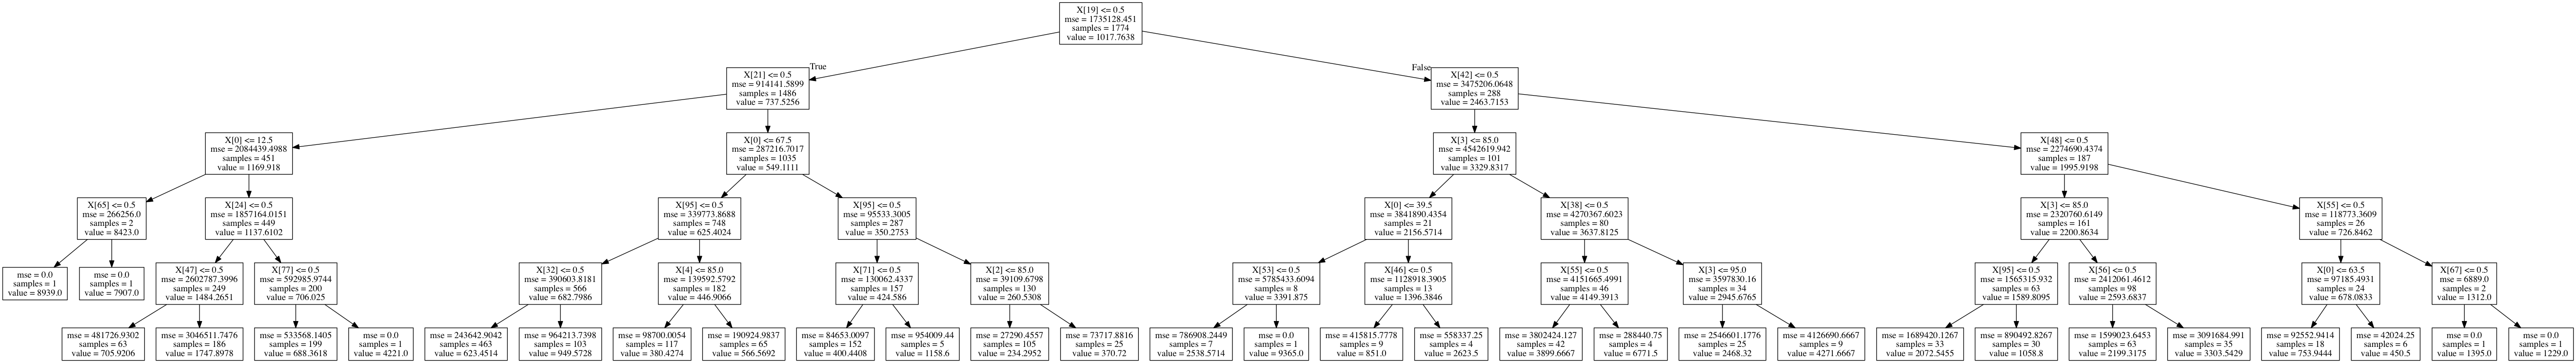

In [329]:
tree.export_graphviz(regressor, out_file = out)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [330]:
from sklearn.ensemble import RandomForestRegressor

In [336]:
forest = RandomForestRegressor(n_estimators = 25)

In [337]:
forest_regressor = regressor.fit(pred_train, tar_train)

In [338]:
forest_predictions = forest_regressor.predict(pred_test)

In [339]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, forest_regressor.predict(pred_train))
test_error = mean_squared_error(tar_test, forest_regressor.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
861375.748505
test data MSE
1129787.7262


In [340]:
# R-square from training and test data
rsquared_train= forest_regressor.score(pred_train,tar_train)
rsquared_test= forest_regressor.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.503566581472
test data R-square
0.371698196366


In [275]:
from sklearn.linear_model import LassoLarsCV

In [286]:
# specify the lasso regression model
model=LassoLarsCV(cv=20, precompute=False).fit(pred_train,tar_train)

//anaconda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:381: RuntimeWarning: overflow encountered in true_divide
  g2 = arrayfuncs.min_pos((C + Cov) / (AA + corr_eq_dir + tiny))
//anaconda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=2.394e-01, previous alpha=2.376e-01, with an active set of 57 regressors.
  ConvergenceWarning)
//anaconda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=2.522e+00, with an active set of 14 regressors, and the smallest cholesky pivot element being 2.581e-08
  ConvergenceWarning)
//anaconda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:377: RuntimeWarning: overflow encountered in true_divide
  g1 = arrayfuncs.mi

In [287]:
model_predictions = model.predict(pred_test)

In [289]:
# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'Age_surgery': -10.739922067177959,
 'CHIR_IK_PRE': 14.381730343992897,
 'Clinical_evolution_P1': 0.0,
 'Clinical_evolution_P2': 0.0,
 'Clinical_evolution_P3': -301.17890968016803,
 'Clinical_evolution_P4': 0.0,
 'Clinical_evolution_TT ini': 342.02029127333333,
 'Gender_F': 0.0,
 'Gender_M': -13.428485598188889,
 'Gene_Cdk4_AMPLIFIE': 0.0,
 'Gene_Cdk4_NORMAL': 0.0,
 'Gene_Ch10P_GAIN': 0.0,
 'Gene_Ch10P_NON PERTE': 0.0,
 'Gene_Ch10P_PARTIEL': -31.237325132116847,
 'Gene_Ch10P_PERDU': 0.34542030310616928,
 'Gene_Ch10Q_GAIN': 0.0,
 'Gene_Ch10Q_NON PERTE': 0.0,
 'Gene_Ch10Q_PARTIEL': 0.0,
 'Gene_Ch10Q_PERDU': 4.7760292889559874,
 'Gene_Ch19Q_GAIN': 0.0,
 'Gene_Ch19Q_NON PERTE': -27.391677533411801,
 'Gene_Ch19Q_PARTIEL': 0.0,
 'Gene_Ch19Q_PERDU': 169.15307715254676,
 'Gene_Ch1P_GAIN': 0.0,
 'Gene_Ch1P_NON PERTE': -8.6587804568394589,
 'Gene_Ch1P_PARTIEL': 69.751897216347345,
 'Gene_Ch1P_PERDU': 430.6414138294179,
 'Gene_Ch9P_GAIN': -226.04016667523729,
 'Gene_Ch9P_NON PERTE': 0.0,
 'Gene_

In [281]:
pred_train

,Age_surgery,IDH_TERT,IK_CLINIQUE,CHIR_IK_PRE,RX_IK_PRE,Gender_F,Gender_M,Tumor_type_astrocytome anaplasique III,Tumor_type_astrocytome bas grade II,Tumor_type_astrocytome gémistocytique (=A2),Tumor_type_astrocytome pilocytique,Tumor_type_gangliogliome,Tumor_type_glioblastome IV,Tumor_type_glioblastome avec oligo. IV,Tumor_type_gliome mixte II,Tumor_type_gliome mixte ana III,Tumor_type_oligo. bas grade II,Tumor_type_oligo.haut grade III,Tumor_grade_1,Tumor_grade_2,Tumor_grade_3,Tumor_grade_4,Gene_Idh1_ALTERE,Gene_Idh1_NC,Gene_Idh1_NORMAL,Gene_Idh2_ALTERE,Gene_Idh2_NC,Gene_Idh2_NORMAL,Gene_Htert_C228T_ALTERE,Gene_Htert_C228T_NC,Gene_Htert_C228T_NORMAL,Gene_Htert_C250T_ALTERE,Gene_Htert_C250T_NC,Gene_Htert_C250T_NORMAL,Gene_P53_ALTERE,Gene_P53_NC,Gene_P53_NORMAL,Gene_Mgmt_METHYLE,Gene_Mgmt_NON METHYLE,Gene_Egfr_AMPLIFIE,Gene_Egfr_NORMAL,Gene_Mdm2_AMPLIFIE,Gene_Mdm2_NORMAL,Gene_Cdk4_AMPLIFIE,Gene_Cdk4_NORMAL,Gene_P16_DELETE,Gene_P16_NORMAL,Gene_Ihc_Atrx_Extinction diffuse,Gene_Ihc_Atrx_Maintien,Gene_Ch1P_GAIN,Gene_Ch1P_NON PERTE,Gene_Ch1P_PARTIEL,Gene_Ch1P_PERDU,Gene_Ch19Q_GAIN,Gene_Ch19Q_NON PERTE,Gene_Ch19Q_PARTIEL,Gene_Ch19Q_PERDU,Gene_Ch10P_GAIN,Gene_Ch10P_NON PERTE,Gene_Ch10P_PARTIEL,Gene_Ch10P_PERDU,Gene_Ch10Q_GAIN,Gene_Ch10Q_NON PERTE,Gene_Ch10Q_PARTIEL,Gene_Ch10Q_PERDU,Gene_Ch9P_GAIN,Gene_Ch9P_NON PERTE,Gene_Ch9P_PARTIEL,Gene_Ch9P_PERDU,Gene_Ch9Q_GAIN,Gene_Ch9Q_NON PERTE,Gene_Ch9Q_PARTIEL,Gene_Ch9Q_PERDU,Tumor_Location_Frontal,Tumor_Location_Rolandique,Tumor_Location_autre,Tumor_Location_cervelet,Tumor_Location_moelle/rachis,Tumor_Location_non précisé,Tumor_Location_sus-T hémisp,Tumor_Location_sus-T hémisp+profond,Tumor_Location_sus-T profond,Tumor_Location_tronc cérébral,Tumor_Location_ventriculaire,Tumor_Position_D,Tumor_Position_G,Tumor_Position_bilatéral,Tumor_Position_médian,Tumor_Position_non précisé,Clinical_evolution_P1,Clinical_evolution_P2,Clinical_evolution_P3,Clinical_evolution_P4,Clinical_evolution_TT ini,Surgery_type_aucune,Surgery_type_biopsie,Surgery_type_exérèse,Surgery_type_partielle
456,44,3,90,70,90,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1712,54,3,60,60,80,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1600,45,4,100,80,70,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1337,86,4,80,60,90,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
321,58,4,90,90,80,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1009,70,4,90,80,90,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1187,53,4,90,80,80,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1795,78,4,70,80,80,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2161,48,3,60,80,80,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1535,29,3,70,90,100,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,

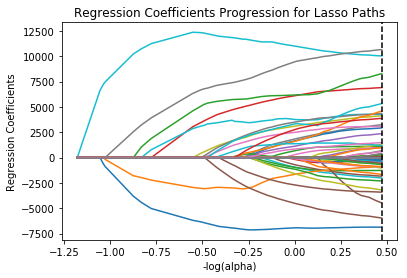

In [290]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

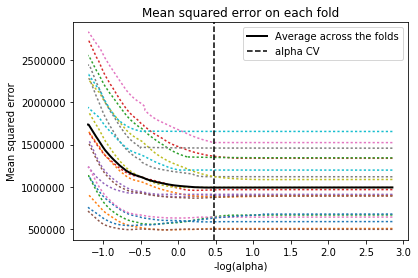

In [291]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [292]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
899068.565737
test data MSE
1024083.58064


In [293]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.48184322306
test data R-square
0.430482783746
